# Testing of the LCD Data

In [26]:
%matplotlib inline

import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f1 = h5py.File("GammaEscan_1_2.h5", "r")
ecal1 = f1["ECAL"]
hcal1 = f1["HCAL"]
targ1 = f1["target"]

f2 = h5py.File("GammaPi0_shuffled_45.h5", "r")
ecal2 = f2["ECAL"]
hcal2 = f2["HCAL"]
targ2 = f2["target"]

f3 = h5py.File("Pi0Escan_4_10.h5", "r")
ecal3 = f3["ECAL"]
hcal3 = f3["HCAL"]
targ3 = f3["target"]

## Check relation between incoming particle energy and summed detector energy

In [27]:
energyf1 = []
energyf2 = []
energyf3 = []

for n in range(0,100):
    sum1 = sum2 = sum3 = 0
    for i in range(0,24):
        for j in range(0,24):
            for k in range(0,25):
                sum1 += ecal1[n*10,i,j,k]
                sum2 += ecal2[n*10,i,j,k]
                sum3 += ecal3[n*10,i,j,k]

    for i in range(0,4):
        for j in range(0,4):
            for k in range(0,60):
                sum1 += hcal1[n*10,i,j,k]
                sum2 += hcal2[n*10,i,j,k]
                sum3 += hcal3[n*10,i,j,k]
    
    energyf1.append(sum1)
    energyf2.append(sum2)
    energyf3.append(sum3)

In [28]:
incomingf1 = []
incomingf2 = []
incomingf3 = []
for n in range(0,100):
    incomingf1.append(targ1[n*10,0,1])
    incomingf2.append(targ2[n*10,0,1])
    incomingf3.append(targ3[n*10,0,1])

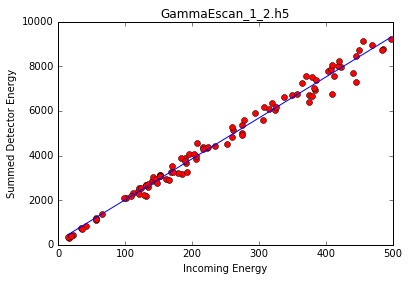

In [59]:
plt.plot(incomingf1, energyf1, 'ro')
plt.xlabel('Incoming Energy')
plt.ylabel('Summed Detector Energy')
plt.title('GammaEscan_1_2.h5')
plt.plot(np.unique(incomingf1), np.poly1d(np.polyfit(incomingf1, energyf1, 1))(np.unique(incomingf1)))
plt.show()

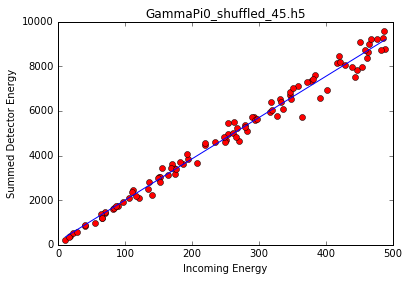

In [60]:
plt.plot(incomingf2, energyf2, 'ro')
plt.xlabel('Incoming Energy')
plt.ylabel('Summed Detector Energy')
plt.title('GammaPi0_shuffled_45.h5')
plt.plot(np.unique(incomingf2), np.poly1d(np.polyfit(incomingf2, energyf2, 1))(np.unique(incomingf2)))
plt.show()

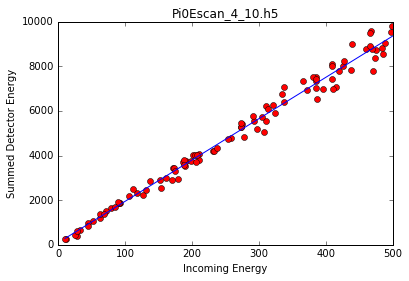

In [61]:
plt.plot(incomingf3, energyf3, 'ro')
plt.xlabel('Incoming Energy')
plt.ylabel('Summed Detector Energy')
plt.title('Pi0Escan_4_10.h5')
plt.plot(np.unique(incomingf3), np.poly1d(np.polyfit(incomingf3, energyf3, 1))(np.unique(incomingf3)))
plt.show()

In [55]:
np.poly1d(np.polyfit(incomingf1, energyf1, 1))

poly1d([  18.34266914,  182.12261644])

In [56]:
np.poly1d(np.polyfit(incomingf2, energyf2, 1))

poly1d([  18.49348485,  152.31938968])

In [57]:
np.poly1d(np.polyfit(incomingf3, energyf3, 1))

poly1d([ 18.53016434,  93.50745555])